# Hierarchical Clustering 실습

[목적]
- 덴드로그램을 그려 Cluster 결정하기
- Clustering은 기본적으로 Data가 많을 대 시간이 굉장히 오래걸림
    - Distance Matrix를 만들고 행렬 계산을 하는 알고리즘이 많기 때문

In [1]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


## 과정
- 1. Data Define
- 2. Modeling

#### 셈플 데이터 만들기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.array(
  [
    [1,5],
    [2,4],
    [4,6],
    [4,3],
    [5,3],
  ]
)

data

array([[1, 5],
       [2, 4],
       [4, 6],
       [4, 3],
       [5, 3]])

계층적 군집(Hierarchical Clustering) 
- linkage argument 속성
  - single : 최단 연결법
  - complete : 최장 연결법
  - average : 평균 연결법
  - ward : 중심 연결법 (default : ward)

#### 계층적 군집화 학습
- 데이터 전부를 묶는 방식의 Clustering

In [4]:
from sklearn.cluster import AgglomerativeClustering
# distance_threshold = 0, n_clusters = None : 모든 것을 계층화함
single_cluster = AgglomerativeClustering(
  distance_threshold = 0, n_clusters = None, linkage='single'
)

In [5]:
single_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

#### Dendorgram

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

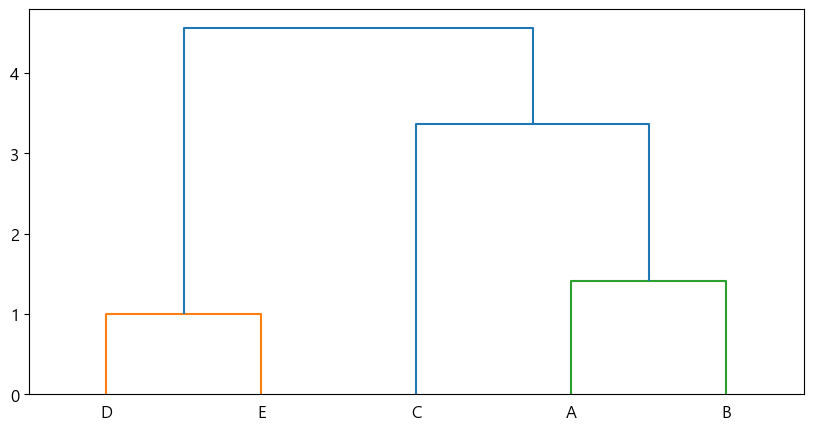

In [7]:
meth = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
HC = linkage(data,method=meth[-1])
plt.figure(figsize=(10,5))
dendrogram(HC,
            # leaf_rotation=90,
            leaf_font_size=12, 
            labels=["A", "B", "C", "D", "E"])
plt.show()

plot_agglomerative_dendrogram 함수 참고 :
- https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

In [8]:
# 덴드로 그램을 그리기위한 함수
def plot_dendrogram(model, **kwargs):
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1   # leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count
    
  linkage_matrix = np.column_stack([model.children_, model.distances_,
                                    counts]).astype(float)
   
  dendrogram(linkage_matrix, **kwargs, labels=["A", "B", "C", "D", "E"])

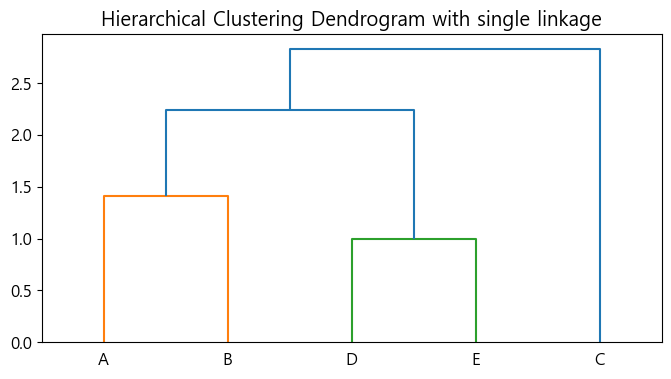

In [9]:
plt.title('Hierarchical Clustering Dendrogram with single linkage')
plot_dendrogram(single_cluster, truncate_mode = 'level', p=3)
plt.show()

시스템 font 파일 확인

In [10]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
#print(font_list[:])
for fl in font_list:
  #print(fl)
    if fl.find("나눔고딕") != -1 or fl.find('NanumGoThic') != -1:
      print(fl)

#### 여러개의 클러스터 만들기
- n개의 clustering으로 만들어 보기

2개의 클러스터로 군집화 하기

In [35]:
single_cluster_2 = AgglomerativeClustering(
  n_clusters=2, linkage='single'
)
single_cluster_2

AgglomerativeClustering(linkage='single')

In [36]:
single_cluster_2.fit(data)

AgglomerativeClustering(linkage='single')

In [37]:
single_cluster_2.labels_

array([0, 0, 1, 0, 0], dtype=int64)

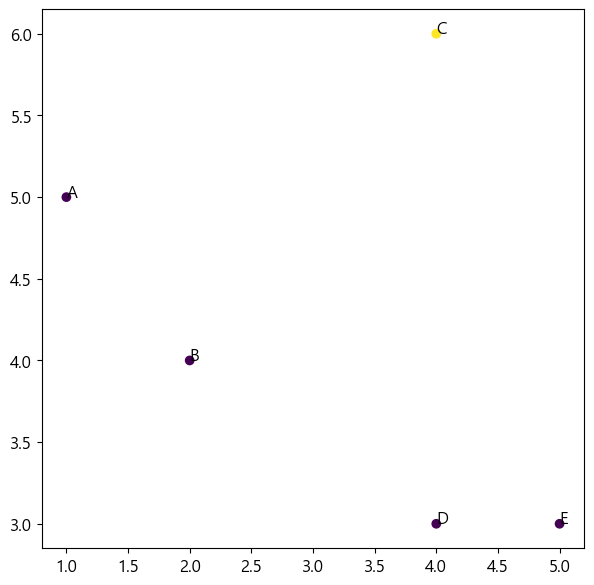

In [38]:
plt.figure(figsize=(7,7))
plt.scatter(data[:, 0], data[:, 1], c=single_cluster_2.labels_) # c는 seaborn의 hue와 동일
for i, txt in enumerate(['A','B','C','D','E']):
  plt.annotate(txt, (data[i, 0], data[i, 1]))

#### 3개의 클러스터

In [47]:
single_cluster_3 = AgglomerativeClustering(
  n_clusters=3, linkage='single'
)

single_cluster_3.fit(data)
single_cluster_3.labels_

array([0, 0, 1, 2, 2], dtype=int64)

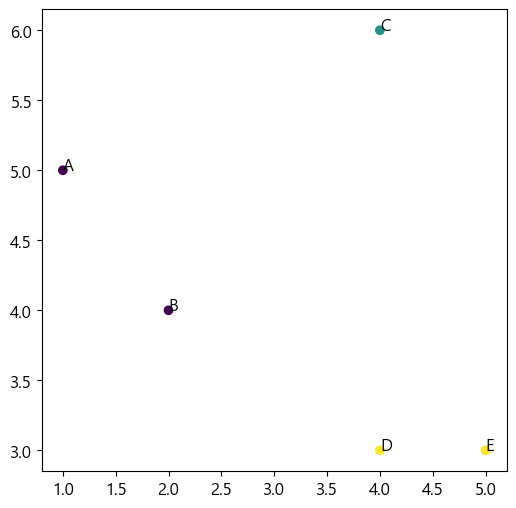

In [48]:
plt.figure(figsize=(6,6))
plt.scatter(data[:, 0], data[:, 1], c=single_cluster_3.labels_)
for i, txt in enumerate(['A','B','C','D','E']):
  plt.annotate(txt, (data[i, 0], data[i, 1]))

#### 다른 군집간 연결법

평균 연결법(linkage='average')

[3 2 4 1 0]


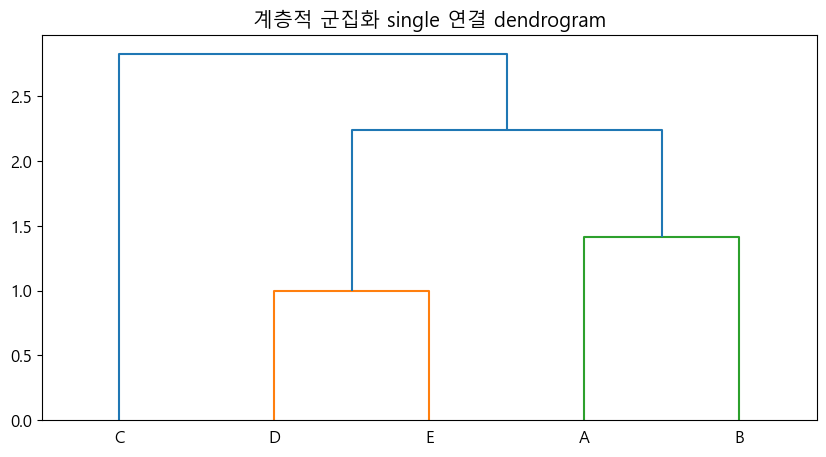

In [29]:
meth = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
HC = linkage(data, method=meth[0])
plt.figure(figsize=(10,5))
dendrogram(HC,
            # leaf_rotation=90,
            leaf_font_size=12, 
            labels=["A", "B", "C", "D", "E"])

print(avg_cluster.labels_)
plt.title('계층적 군집화 single 연결 dendrogram')
plt.show()

[3 2 4 1 0]


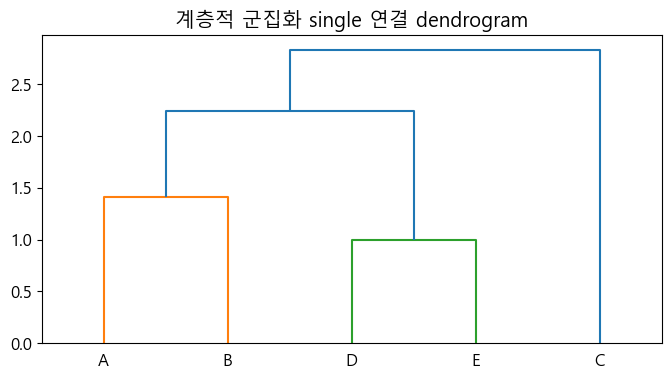

In [30]:
# 사이킷런을 모듈을 활용한 덴드로 그램
avg_cluster = AgglomerativeClustering(
  distance_threshold=0, n_clusters=None, linkage='single'
)

avg_cluster.fit(data)
print(avg_cluster.labels_)
plt.title('계층적 군집화 single 연결 dendrogram')
plot_dendrogram(avg_cluster, truncate_mode = 'level', p=3)

최장 연결(linkage='complete')

[3 4 2 1 0]


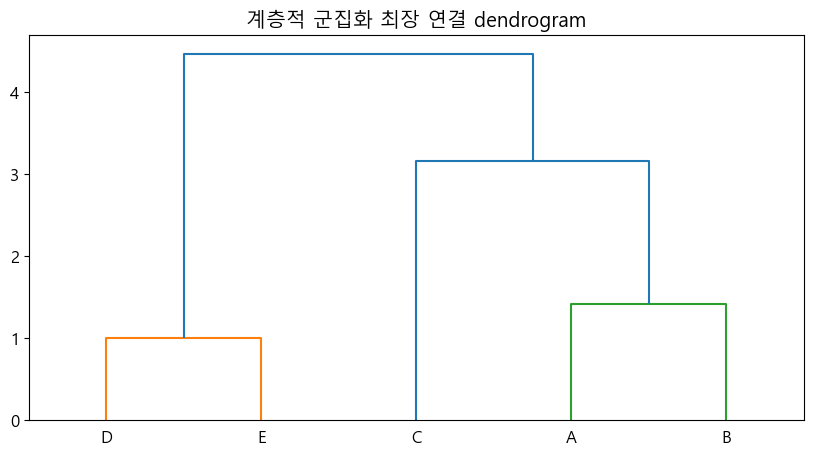

In [22]:
# 사이파이 모듈 활용
meth = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
HC = linkage(data, method=meth[1])
plt.figure(figsize=(10,5))
dendrogram(HC,
            # leaf_rotation=90,
            leaf_font_size=12, 
            labels=["A", "B", "C", "D", "E"])

print(avg_cluster.labels_)
plt.title('계층적 군집화 최장 연결 dendrogram')
plt.show()

[3 4 2 1 0]


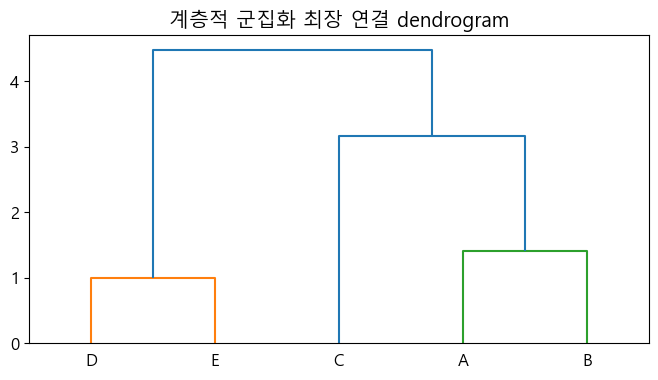

In [23]:
max_cluster = AgglomerativeClustering(
  distance_threshold=0, n_clusters=None, linkage='complete'
)

max_cluster.fit(data)
print(max_cluster.labels_)
plt.title('계층적 군집화 최장 연결 dendrogram')
plot_dendrogram(max_cluster, truncate_mode = 'level', p=3)

중심 연결법(linkage='ward')

[3 4 2 1 0]


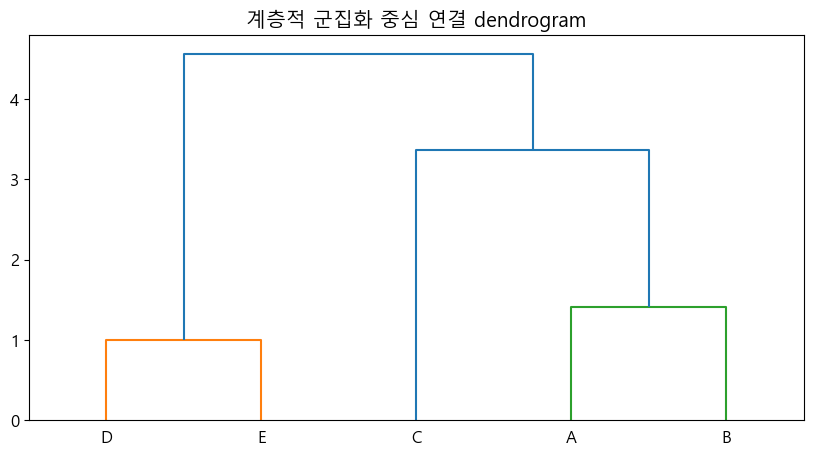

In [24]:
meth = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
HC = linkage(data, method=meth[-1])
plt.figure(figsize=(10,5))
dendrogram(HC,
            # leaf_rotation=90,
            leaf_font_size=12, 
            labels=["A", "B", "C", "D", "E"])

print(avg_cluster.labels_)
plt.title('계층적 군집화 중심 연결 dendrogram')
plt.show()

[3 4 2 1 0]


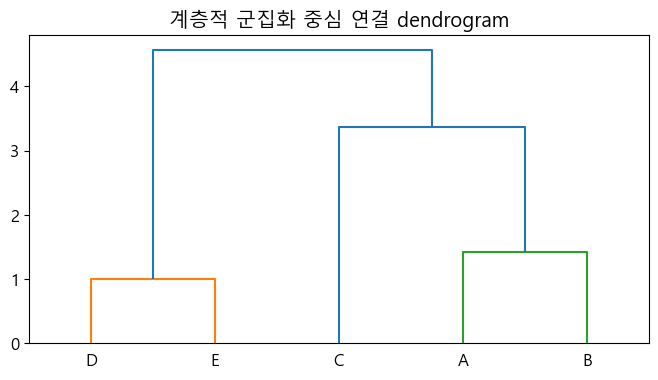

In [18]:
centroid_cluster = AgglomerativeClustering(
  distance_threshold=0, n_clusters=None, linkage='ward'
)

centroid_cluster.fit(data)
print(centroid_cluster.labels_)
plt.title('계층적 군집화 중심 연결 dendrogram')
plot_dendrogram(centroid_cluster, truncate_mode = 'level', p=3)

계층적 군집화 Dendrogram 모두 그리기

In [19]:
clusters = [['Single', single_cluster],
            ['Average', avg_cluster],
            ['Maximum', max_cluster],
            ['Centroid', centroid_cluster],
]

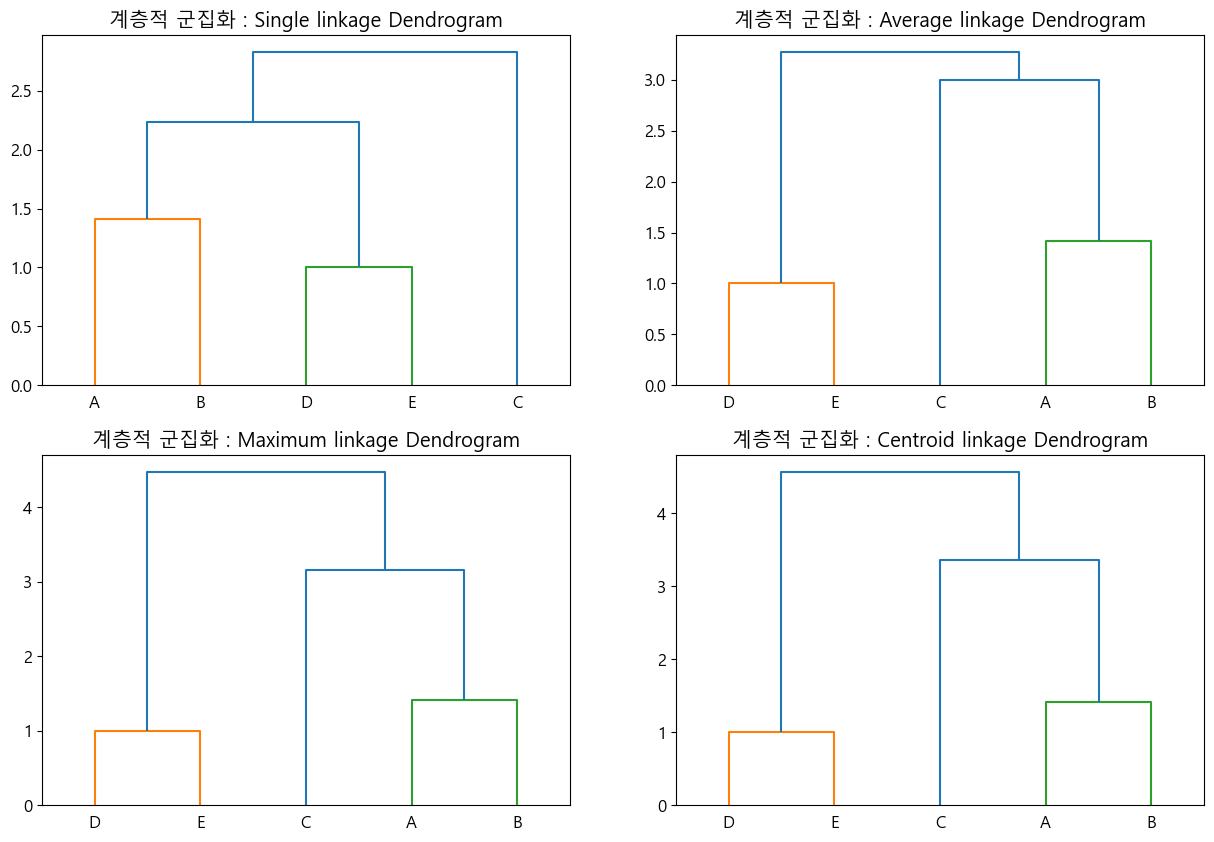

In [20]:
nrows, ncols = 2, 2
fig, axes_list = plt.subplots(nrows, ncols, figsize=(15, 10))
for idx, (name, cluster) in enumerate(clusters):
  ax = axes_list[int(idx/2), int(idx%2)]
  ax.set_title(f'계층적 군집화 : {name} linkage Dendrogram')
  plot_dendrogram(cluster, truncate_mode='level', p=3, ax=ax)